**Exercici 1**. 

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:  

- Una variable categòrica (Districte o Barri)  
- Una variable numèrica (Preu)  
- Una variable numèrica i una categòrica (Districte i Preu)  
- Dues variables numèriques (Any o Trimestre i Preu)  
- Tres variables (Barri o Districte, Trimestre i Preu)  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
data_lloguer = pd.read_csv('preu lloguer per trimestre i barri.csv')
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 300)

data_lloguer.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9


In [3]:
data_lloguer.shape

(584, 8)

In [4]:
data_lloguer.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.00,584.00,584.00
mean,2021.0,2.50,6.25,37.00
std,0.0,1.12,2.79,21.09
min,2021.0,1.00,1.00,1.00
25%,2021.0,1.75,4.00,19.00
50%,2021.0,2.50,7.00,37.00
75%,2021.0,3.25,8.00,55.00
max,2021.0,4.00,10.00,73.00


In [5]:
data_lloguer['Preu'] = pd.to_numeric(data_lloguer['Preu'], errors = 'coerce')
data_lloguer.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.00,584.00,584.00,540.00
mean,2021.0,2.50,6.25,37.00,442.16
std,0.0,1.12,2.79,21.09,457.36
min,2021.0,1.00,1.00,1.00,6.70
25%,2021.0,1.75,4.00,19.00,12.78
50%,2021.0,2.50,7.00,37.00,232.75
75%,2021.0,3.25,8.00,55.00,815.88
max,2021.0,4.00,10.00,73.00,1816.50


In [6]:
data_lloguer.isna().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

In [7]:
data_lloguer2 = data_lloguer.loc[-data_lloguer['Preu'].isnull()].copy()

In [8]:
print(data_lloguer2.isna().sum())
print('\n')
print('Num. de Años: ' + str(len(set(data_lloguer2['Any']))))
print('Num. de Trimestres: ' + str(len(set(data_lloguer2['Trimestre']))))
print('Num. de Districtes: ' + str(len(set(data_lloguer2['Nom_Districte']))))
print('Num. de Barris: ' + str(len(set(data_lloguer2['Nom_Barri']))))
print('Tipos de precio / lloguer: ' + str(len(set(data_lloguer2['Lloguer_mitja']))))


Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64


Num. de Años: 1
Num. de Trimestres: 4
Num. de Districtes: 10
Num. de Barris: 68
Tipos de precio / lloguer: 2


In [9]:
print(set(data_lloguer['Lloguer_mitja']))

{'Lloguer mitjà mensual (Euros/mes)', 'Lloguer mitjà per superfície (Euros/m2 mes)'}


#### Visualització: Una variable categòrica (Districte o Barri).

In [11]:
Fr_Distr = data_lloguer2.groupby('Nom_Districte').size()
Fr_Distr

Nom_Districte
Ciutat Vella           32
Eixample               48
Gràcia                 40
Horta-Guinardó         80
Les Corts              24
Nou Barris             80
Sant Andreu            52
Sant Martí             80
Sants-Montjuïc         56
Sarrià-Sant Gervasi    48
dtype: int64

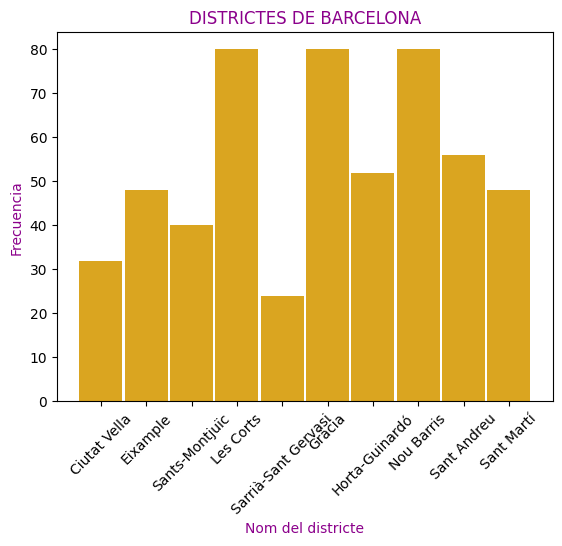

In [12]:
Distritos = data_lloguer2['Nom_Districte'].unique()
Fr_Distr = data_lloguer2.groupby('Nom_Districte').size()
plt.xticks(rotation= 45, )
plt.ylabel('Frecuencia', c = 'darkmagenta')
plt.xlabel('Nom del districte', c='darkmagenta')
plt.title('DISTRICTES DE BARCELONA', c = 'darkmagenta')
plt.bar(Distritos, Fr_Distr, width = 0.95, color = 'goldenrod');
plt.savefig("Districte.pdf", format = 'pdf')

El gràfic és una visualització d‟una variable categòrica (En aquest cas els Districtes de Barcelona).
S'aprecia la freqüència amb què apareixen al dataframe (Sarrià-Sant Gervasi està força menys representat que altres com les Corts, Gràcia o Nou Barris).

#### Visualització: Una variable numèrica (Preu).

In [13]:
data_Preu_m2 = data_lloguer2[data_lloguer2['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
data_Preu_m2.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5


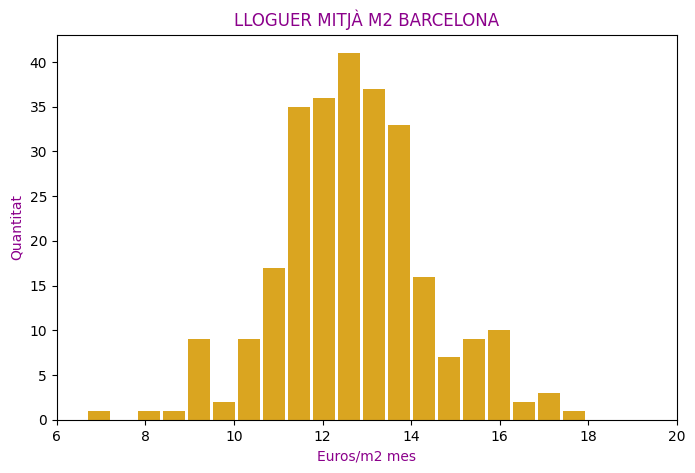

In [14]:
Preu_m2 = data_Preu_m2['Preu']
plt.figure(figsize=(8, 5))
plt.xlim(Preu_m2.min(),Preu_m2.max())
plt.xticks(range(6,21,2))
plt.ylabel('Quantitat', c = 'darkmagenta')
plt.xlabel('Euros/m2 mes', c='darkmagenta')
plt.title('LLOGUER MITJÀ M2 BARCELONA', c = 'darkmagenta')
plt.hist(Preu_m2, width = 0.5, color = 'goldenrod', bins = 20);
plt.savefig("Preu.pdf", format = 'pdf')

Representació gràfica d'una variable numèrica (Preu mitjà del lloguer per metre quadrat).
S'aprecia una distribució semblant a la normal, sent el preu més comú el que es troba al centre de la distribució (Entre 11 i 15 €/m2 mes.).

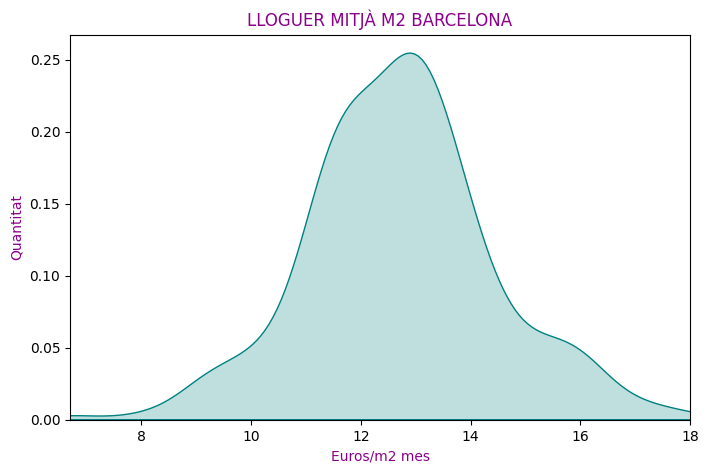

In [15]:
Preu_m2 = data_Preu_m2['Preu']
plt.figure(figsize=(8, 5))
plt.xlim(Preu_m2.min(),Preu_m2.max())
plt.xticks()
plt.ylabel('Quantitat', c = 'darkmagenta')
plt.xlabel('Euros/m2 mes', c='darkmagenta')
plt.title('LLOGUER MITJÀ M2 BARCELONA', c = 'darkmagenta')
sns.kdeplot(Preu_m2, color='teal', fill=True)
#sns.violinplot(x=Preu_m2, split=True, inner="quartile", palette="husl")
plt.show();

#### Visualització: Una variable numèrica i una categòrica (Districte i Preu).

In [16]:
data_Preu_lloguer_mitja = data_lloguer2[data_lloguer2['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
data_Preu_lloguer_mitja.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9


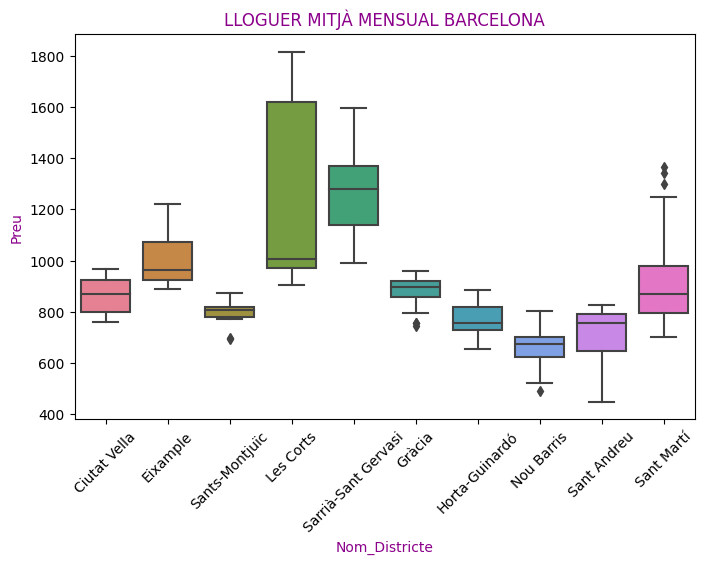

In [17]:
Preu_lloguer_mitja = data_Preu_lloguer_mitja['Preu']
Distritos = data_lloguer2['Nom_Districte'].unique()
plt.figure(figsize=(8, 5))
plt.xlim(Preu_lloguer_mitja.min(),Preu_lloguer_mitja.max())
plt.xticks(rotation= 45)
plt.ylabel('Preu', c = 'darkmagenta')
plt.xlabel('Districte', c='darkmagenta')
plt.title('LLOGUER MITJÀ MENSUAL BARCELONA', c = 'darkmagenta')
sns.boxplot(x = 'Nom_Districte', y = 'Preu', data = data_Preu_lloguer_mitja, palette='husl');
plt.savefig("Districte_Preu.pdf", format = 'pdf')

#### Visualització: Dues variables numèriques (Any o Trimestre i Preu).

In [18]:
data_Preu_lloguer_mitja = data_lloguer2[data_lloguer2['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
data_Preu_lloguer_mitja.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9


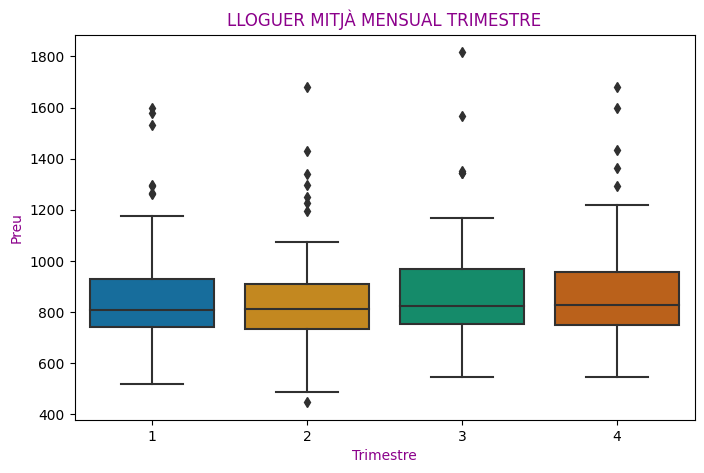

In [19]:
Preu_lloguer_mitja = data_Preu_lloguer_mitja['Preu']
Distritos = data_lloguer2['Trimestre'].unique()
plt.figure(figsize=(8, 5))
plt.ylabel('Preu', c = 'darkmagenta')
plt.xlabel('Trimestres', color = 'darkmagenta')
plt.title('LLOGUER MITJÀ MENSUAL TRIMESTRE', c = 'darkmagenta')
sns.boxplot(x = 'Trimestre', y = 'Preu', data = data_Preu_lloguer_mitja, palette = 'colorblind')
plt.savefig("Trimestre_Preu.pdf", format = 'pdf')
plt.show()

Visualització de dues variables numèriques (Trimestre i preu). El gràfic boxplot mostra aquí les possibles variacions del preu en els diferents períodes de l'any.  
La segona meitat de l'any sembla que desplaça una mica el preu a l'alça, més el tercer trimestre que el quart, coincidint amb l'estiu.

#### Visualització: Tres variables (Barri o Districte, Trimestre i Preu)

In [20]:
data_Preu_lloguer_mitja = data_lloguer2[data_lloguer2['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
data_Preu_lloguer_mitja.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9


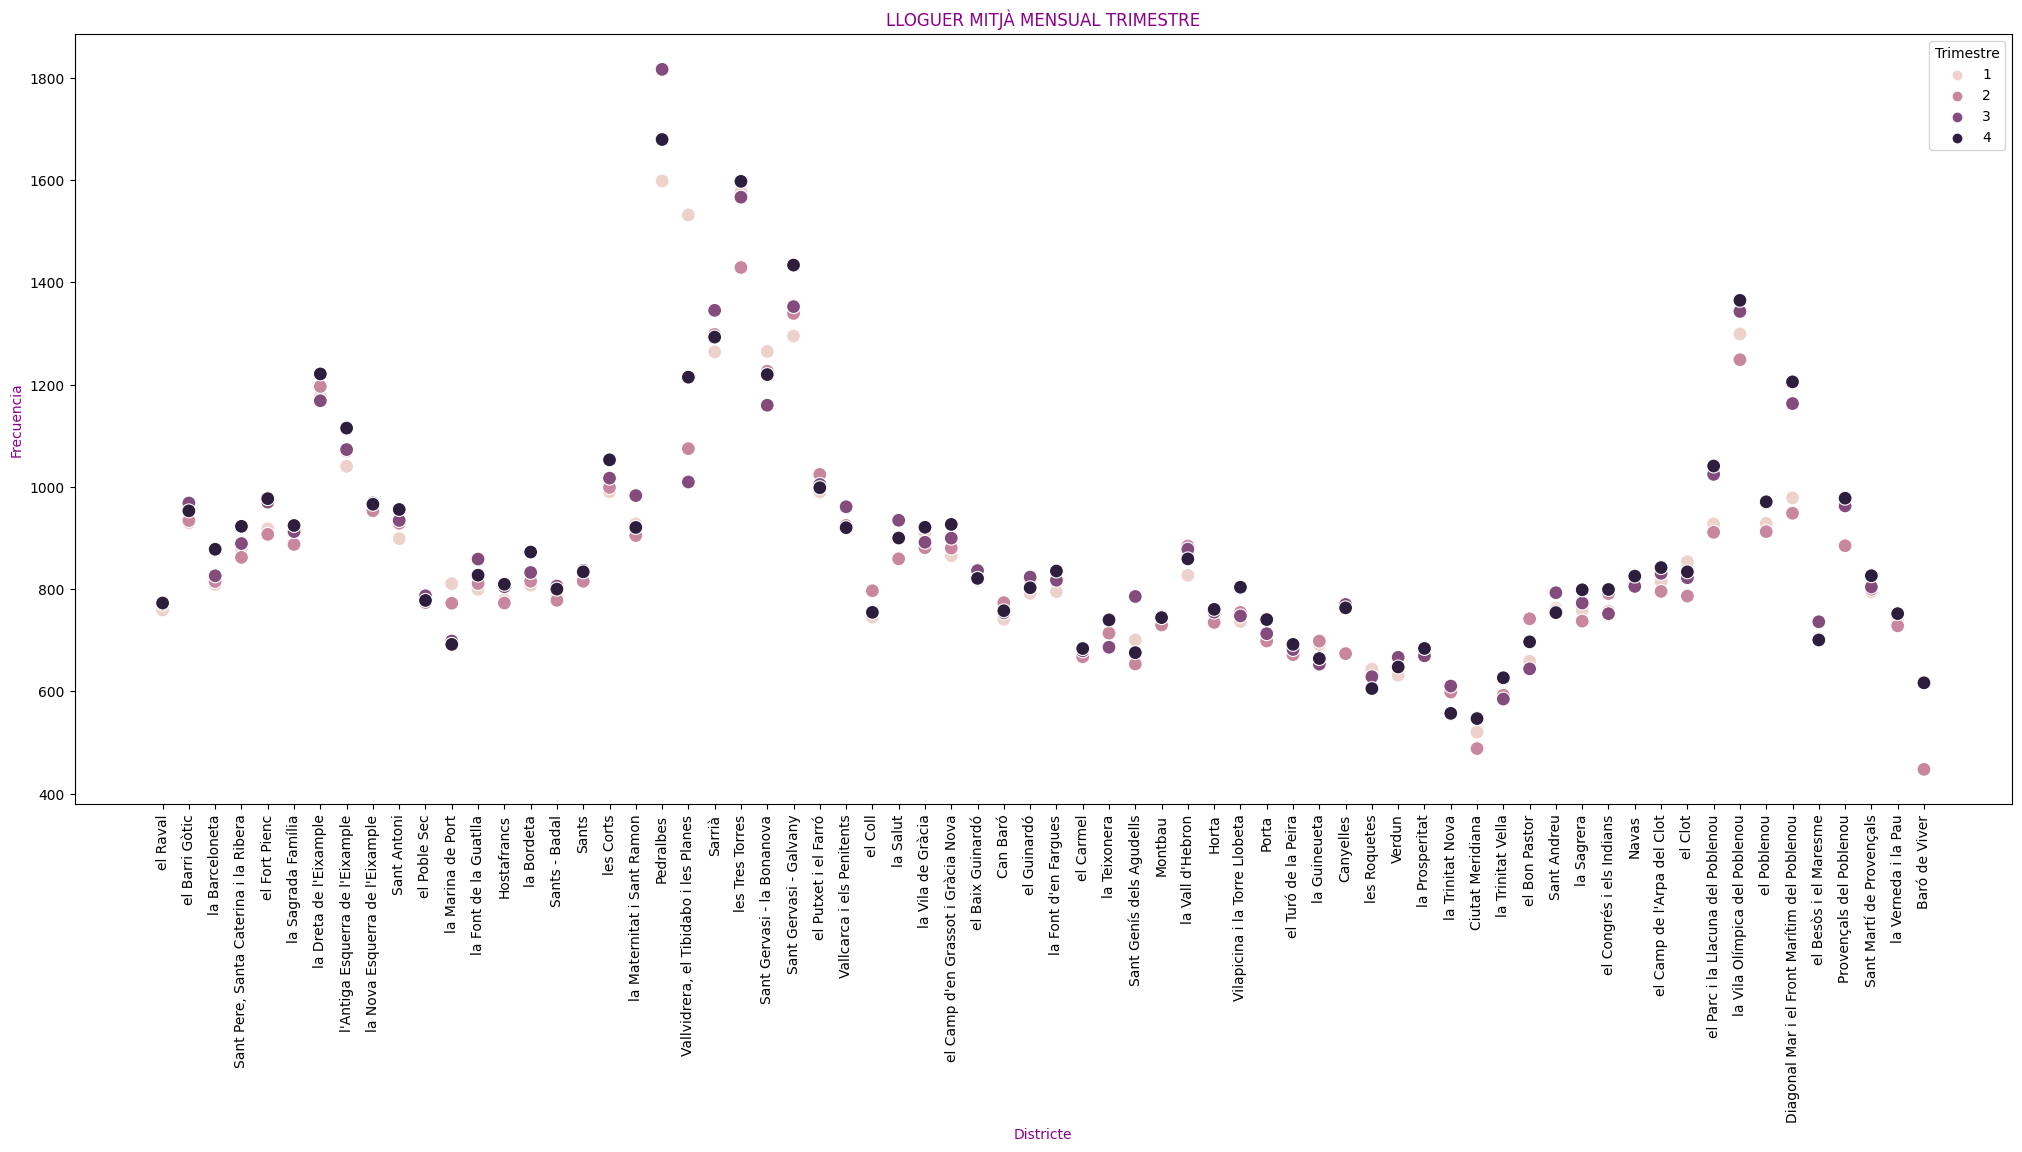

In [21]:
Barri = data_Preu_lloguer_mitja['Nom_Barri']
Preu_lloguer_mitja = data_Preu_lloguer_mitja['Preu']
Trimestre = data_Preu_lloguer_mitja['Trimestre']

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.ylabel('Frecuencia', c='darkmagenta')
plt.xlabel('Districte', c='darkmagenta')
plt.title('LLOGUER MITJÀ MENSUAL TRIMESTRE', c='darkmagenta')
sns.scatterplot(x=Barri, y=Preu_lloguer_mitja, hue=Trimestre, s=100)

plt.savefig("Barri_Trimestre_Preu.pdf", format = 'pdf')
plt.show();


En aquesta ocasió, és un gràfic que representa la relació entre tres variables (Barrri, trimestre i preu).
He triat un gràfic de dispersió on l'eix X mostra els barris de barcelona i l'eix Y el preu mitjà per més del lloguer.
Per a cada barri hi apareixen quatre punts, que marquen sobre l'eix Y, el valor. Els quatre punts, diferenciats per quatre colors, representen cadascun dels trimestres.

**Exercici 2**

Exporta els gràfics com imatges o com HTML.

In [22]:
plt.savefig("Barri_Trimestre_Preu.pdf", format = 'pdf')
plt.savefig("Trimestre_Preu.pdf", format = 'pdf')
plt.savefig("Districte_Preu.pdf", format = 'pdf')
plt.savefig("Preu.pdf", format = 'pdf')
plt.savefig("Districte.pdf", format = 'pdf')
plt.savefig("Districte_rang.pdf", format = 'pdf')

<Figure size 640x480 with 0 Axes>

**Exercici 3**

Proposa alguna visualització que creguis que pot resultar interessant.

In [24]:
#Districte = data_Preu_lloguer_mitja['Nom_Districte'].unique()
#Dist_Max = data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].max()
#Dist_Min = data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].min()
#Dist_Range = data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].agg(['max', 'min'])
#Dist_RangeN = (data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].max() - data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].min())


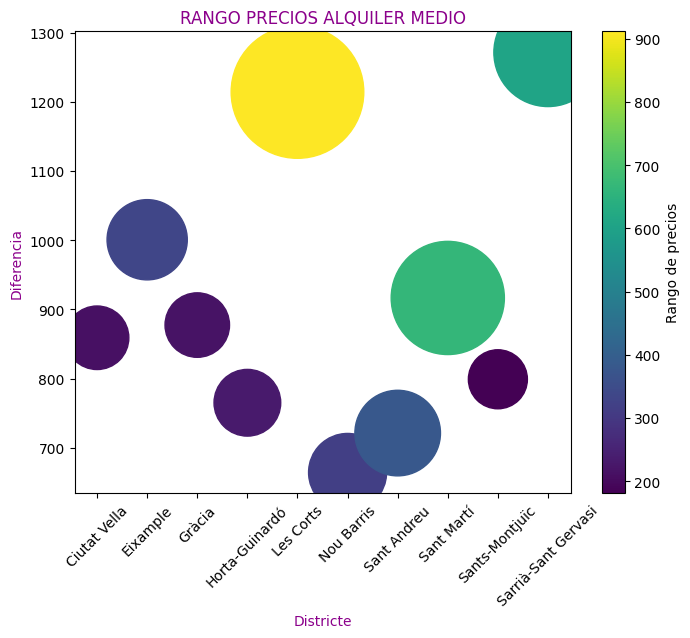

Nom_Districte
Ciutat Vella           209.2
Eixample               333.7
Gràcia                 215.6
Horta-Guinardó         230.7
Les Corts              911.7
Nou Barris             315.6
Sant Andreu            379.7
Sant Martí             664.2
Sants-Montjuïc         180.6
Sarrià-Sant Gervasi    607.3
Name: Preu, dtype: float64


In [25]:
Districte = data_Preu_lloguer_mitja['Nom_Districte'].unique()
Dist_mean = data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].mean()
Dist_RangeN = (data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].max() - data_Preu_lloguer_mitja.groupby('Nom_Districte')['Preu'].min())

Districte_p = pd.Series(Districte)
Districte_p = Districte_p.sort_values()

bubble_sizes = Dist_RangeN *10  # Ajusta el factor de escala según tus necesidades

plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
plt.ylabel('Diferencia', c='darkmagenta')
plt.xlabel('Districte', c='darkmagenta')
plt.title('RANGO PRECIOS ALQUILER MEDIO', c='darkmagenta')

plt.scatter(x = Districte_p, y = Dist_mean, s=bubble_sizes, c = Dist_RangeN)

plt.colorbar(label='Rango de precios')
plt.savefig("Districte_rang.pdf", format = 'pdf')

plt.show()

print(Dist_RangeN)


Atès que la mitjana és només un punt dins de l'espectre, he representat tres variables (Districte, preu i he afegit un rang de preus que és la diferència del maxim i el minim dins de cada districte). Amb aquest rang, es pot apreciar visualment si els preus són semblants o no.
Al gràfic s'aprecia que hi ha molta diferència d'uns barris als altres. En un districte com Sants-Montjuïc, sabent la mitjana, no diferiran gaire els preus els uns dels altres. En canvi, en un barri com les Corts, valdrà la pena invertir més temps a buscar, tot i saber la mitjana, perquè les diferències de preu poden suposar 900€.
A la dreta del gràfic, hi ha una barra de colors que es correspon amb el rang de preus de les bombolles.
(La grandària de les bombolles és orientativa, ja que tot i ser proporcionals al rang, no són numèricament exactes atès que estan sobredimensionades per a una millor visualització)